In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

note that change the data source


In [5]:
data = pd.read_excel("D:\\học đại học\\20222\\machine learning\\bit_coin.xlsx")

In [6]:
data.head()

,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,...,exchange_to_exchange_transactions,exchange_supply_ratio,coinbase_premium_index,miner_reserve,miner_reserve_USD,miner_outflow,miner_inflow,open_interest,funding_rate,exchange_whale_ratio
0,1513591200000,18680.48,18975.50,18656.98,18753.31,287.814379,5.404029e+06,2954,128.126729,2.406455e+06,...,NaN,0.111518,1.463517,1.896991e+06,3.552268e+10,NaN,NaN,NaN,0.06250,0.899692
1,1513594800000,18753.31,19200.10,18731.00,19126.66,416.429530,7.906948e+06,3854,163.090042,3.095814e+06,...,305.0,0.111491,0.770361,1.897051e+06,3.599624e+10,50.548328,110.779613,NaN,0.06250,0.816011
2,1513598400000,19116.11,19300.00,19100.02,19161.00,242.028218,4.637858e+06,2018,129.565998,2.483612e+06,...,486.0,0.111484,0.869080,1.897023e+06,3.612737e+10,294.564131,266.241964,NaN,0.01995,0.826657
3,1513602000000,19161.00,19201.00,18111.65,18606.00,435.048989,8.177681e+06,3679,155.927541,2.931393e+06,...,523.0,0.111466,0.865843,1.897068e+06,3.541903e+10,330.920998,375.531862,NaN,0.01995,0.870376
4,1513605600000,18649.98,18674.98,18021.98,18548.06,658.215507,1.208459e+07,6470,314.630760,5.777161e+06,...,222.0,0.111534,1.417187,1.897242e+06,3.481514e+10,52.298343,226.676766,NaN,0.01995,0.875703


In [8]:
target= data.reset_index()['close']
print(target)

0        18753.31
1        19126.66
2        19161.00
3        18606.00
4        18548.06
           ...   
43017    16633.75
43018    16679.49
43019    16738.20
43020    16700.68
43021    16719.98
Name: close, Length: 43022, dtype: float64


In [10]:
target.shape

(43022,)

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
target=scaler.fit_transform(np.array(target).reshape(-1,1))

In [12]:
target.shape

(43022, 1)

In [13]:
training_size=int(len(target)*0.8)
test_size=len(target)-training_size
train_data,test_data=target[0:training_size,:],target[training_size:len(target),:1]

In [22]:
train_data.shape,test_data.shape

((34417, 1), (8605, 1))

In [23]:
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(len(data) - sequence_length-1):
        x.append(data[i:(i+sequence_length),0])
        y.append(data[i+sequence_length,0])
    return np.array(x), np.array(y)
sequence_length = 30
train_x, train_y = create_sequences(train_data, sequence_length)
test_x, test_y = create_sequences(test_data, sequence_length)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(units=25,return_sequences=True,input_shape=(sequence_length,1)))
model.add(LSTM(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_x,train_y,epochs=10, batch_size=32)

Epoch 1/10
1075/1075 [==============================] - 34s 23ms/step - loss: 6.2273e-04
Epoch 2/10
1075/1075 [==============================] - 18s 17ms/step - loss: 7.3907e-05
Epoch 3/10
1075/1075 [==============================] - 17s 16ms/step - loss: 5.6918e-05
Epoch 4/10
1075/1075 [==============================] - 18s 16ms/step - loss: 4.5278e-05
Epoch 5/10
1075/1075 [==============================] - 18s 16ms/step - loss: 4.0437e-05
Epoch 6/10
1075/1075 [==============================] - 19s 18ms/step - loss: 3.4838e-05
Epoch 7/10
1075/1075 [==============================] - 18s 17ms/step - loss: 2.7345e-05
Epoch 8/10
1075/1075 [==============================] - 18s 17ms/step - loss: 2.4781e-05
Epoch 9/10
1075/1075 [==============================] - 18s 17ms/step - loss: 2.0220e-05
Epoch 10/10
1075/1075 [==============================] - 19s 18ms/step - loss: 1.8003e-05


In [42]:
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)
actual_prices = np.array(test_y).reshape(-1,1)
actual_prices = scaler.inverse_transform(actual_prices)


268/268 [==============================] - 1s 5ms/step


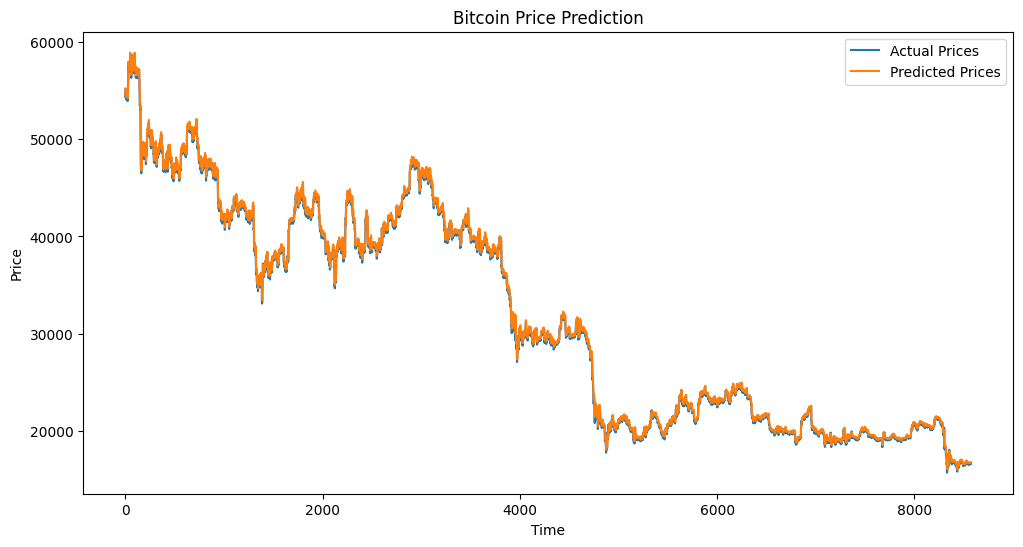

In [47]:
import matplotlib.pyplot as plt
# Plot the predicted and actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

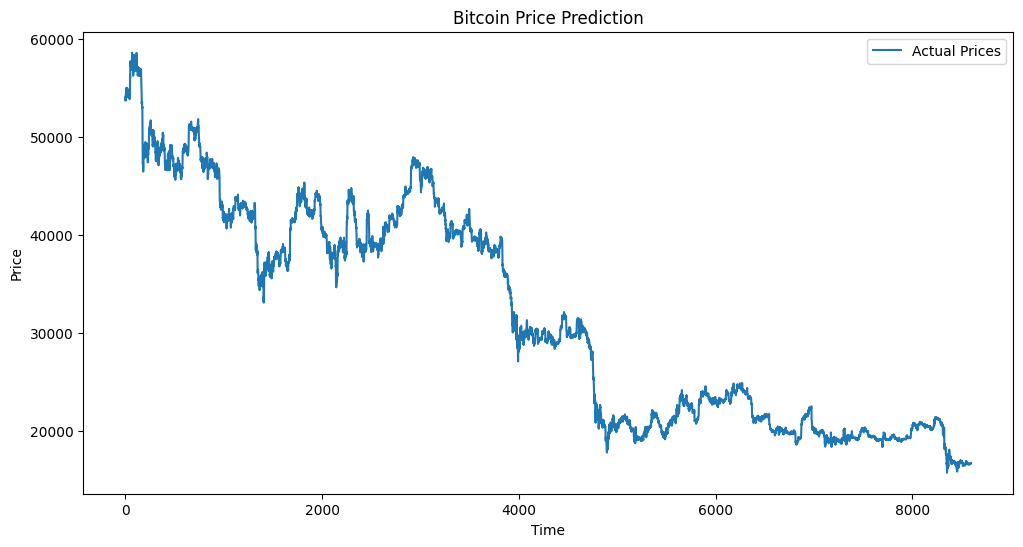

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted and actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
# plt.plot(predictions, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
